**DATASET 2 - Lung Cancer Prediction Using Air Pollution, Alcohol, Smoking & Risk of Lung Cancer**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data2=pd.read_csv('dataset2.csv')

In [ ]:
data2.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data2.drop_duplicates(inplace=True)

Dropping index and the patient ID

In [ ]:
data2.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
data2.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

The feature "Level" is a categorical value and will be encoded.

In [ ]:
data2["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [ ]:
data2.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


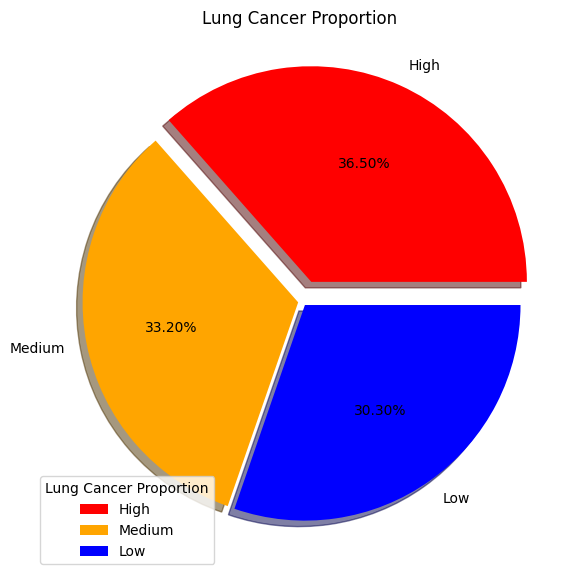

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,7))
colors = ['red', 'orange', 'blue']
plt.title("Lung Cancer Proportion ")
plt.pie(data2['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], shadow=True,autopct = "%1.2f%%", colors = colors)
plt.legend(title = "Lung Cancer Proportion", loc = "lower left")
plt.show()
plt.savefig('Lung Cancer Proportion.png')

We can find the realtion between the variables using a correlation matrix using Heatmap

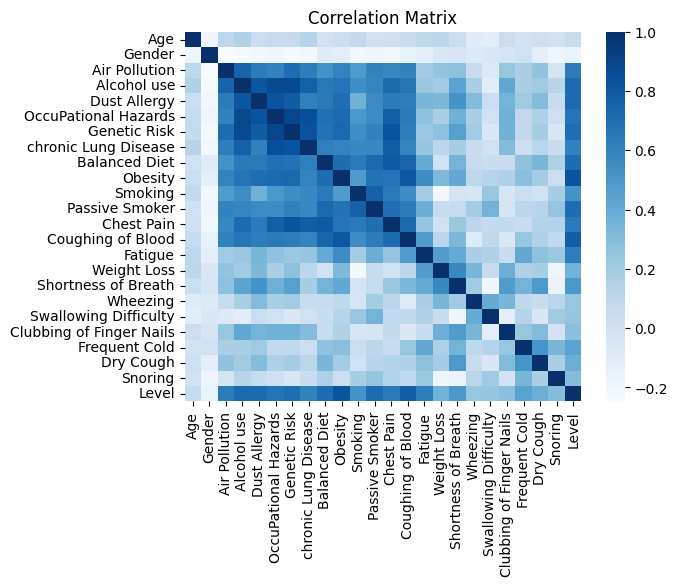

In [ ]:
data2Corr=data2.corr()
plt.title("Correlation Matrix")
sns.heatmap(data2Corr, cmap='Blues')
plt.show()

Men and women in the dataset

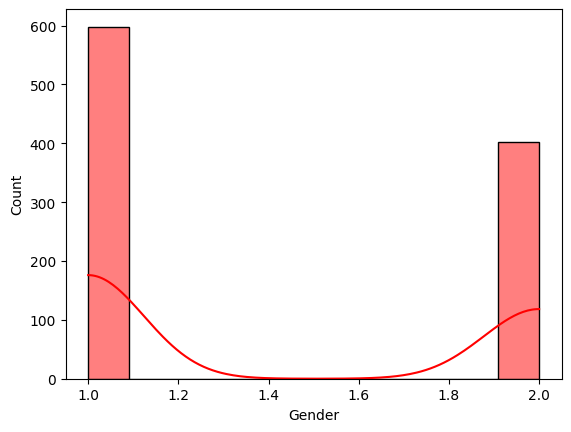

In [ ]:
sns.histplot(data2['Gender'], kde=True, color = 'red')
plt.show()

Relation of various features with different levels of cancer.<br>
The height of the KDE line at any given point represents the density of data points around that value. Peaks indicate areas where data points are more concentrated, while valleys indicate areas with fewer data points.

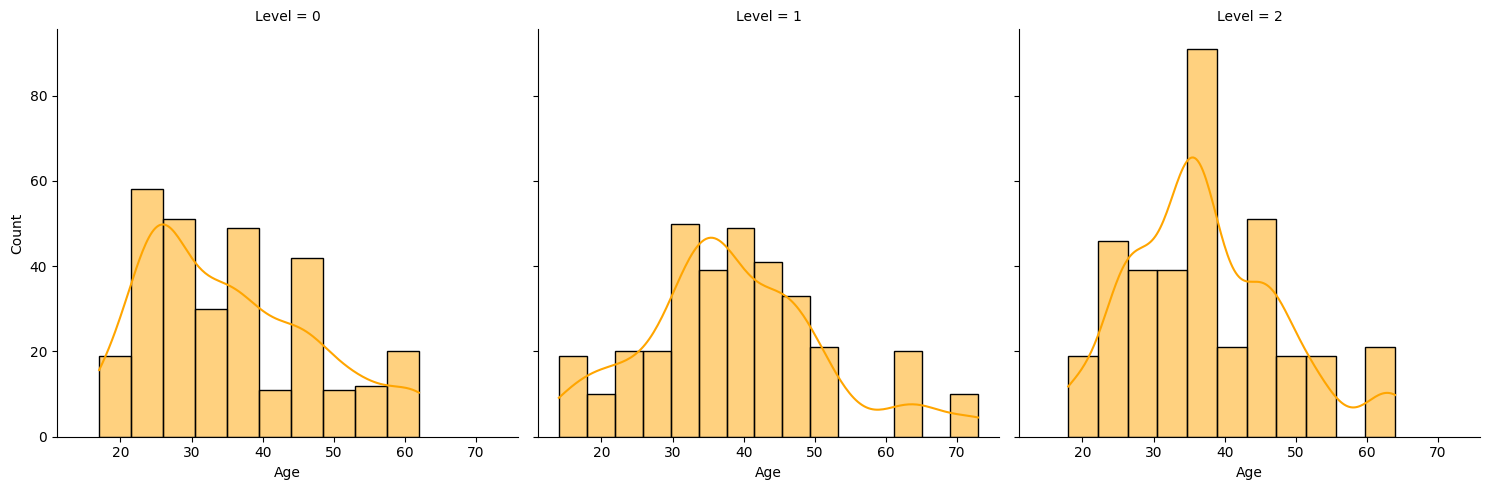

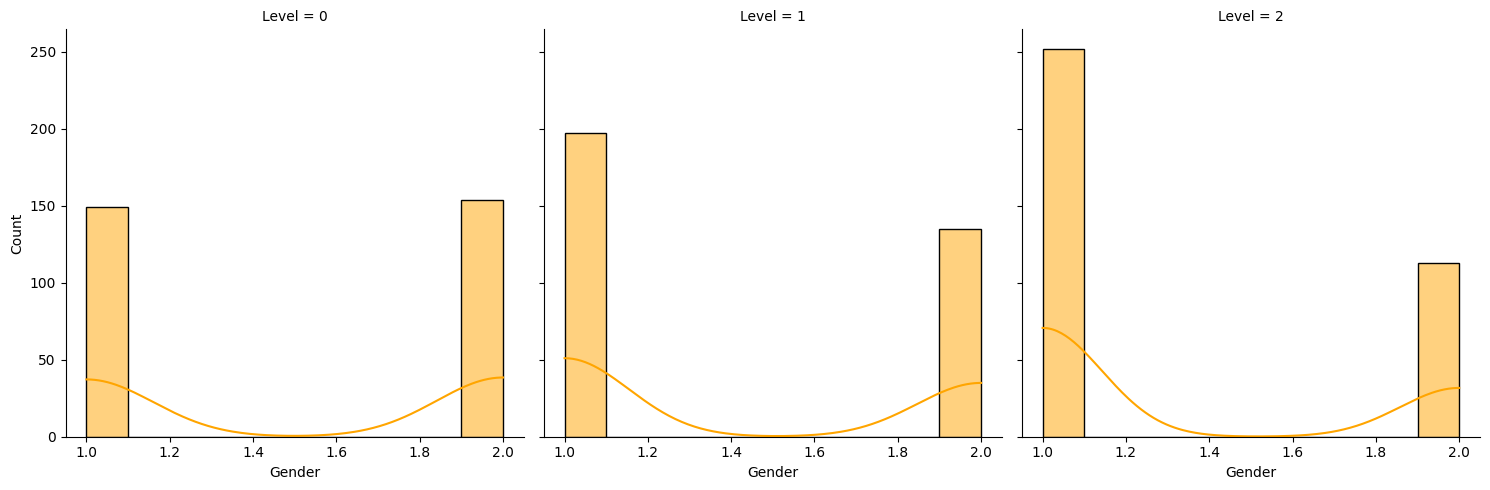

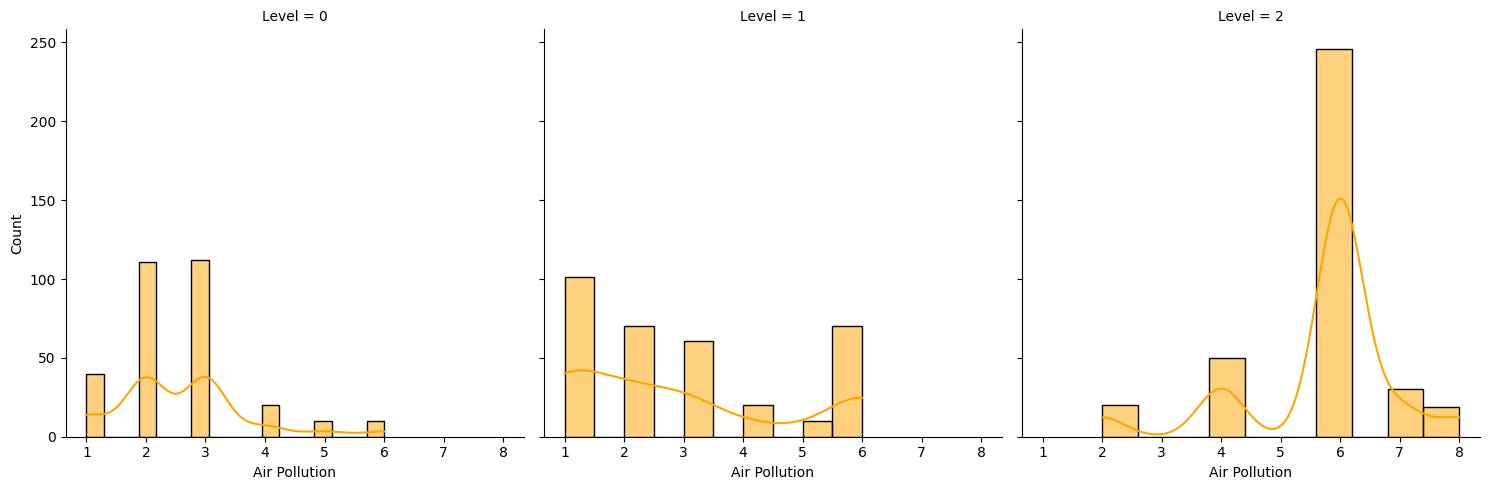

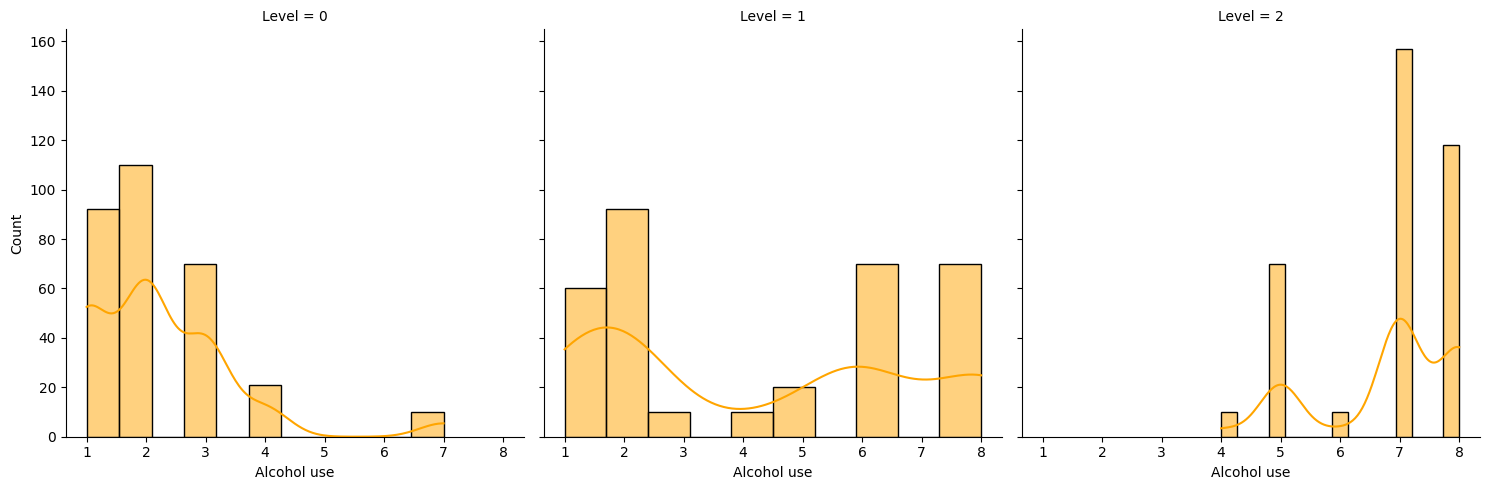

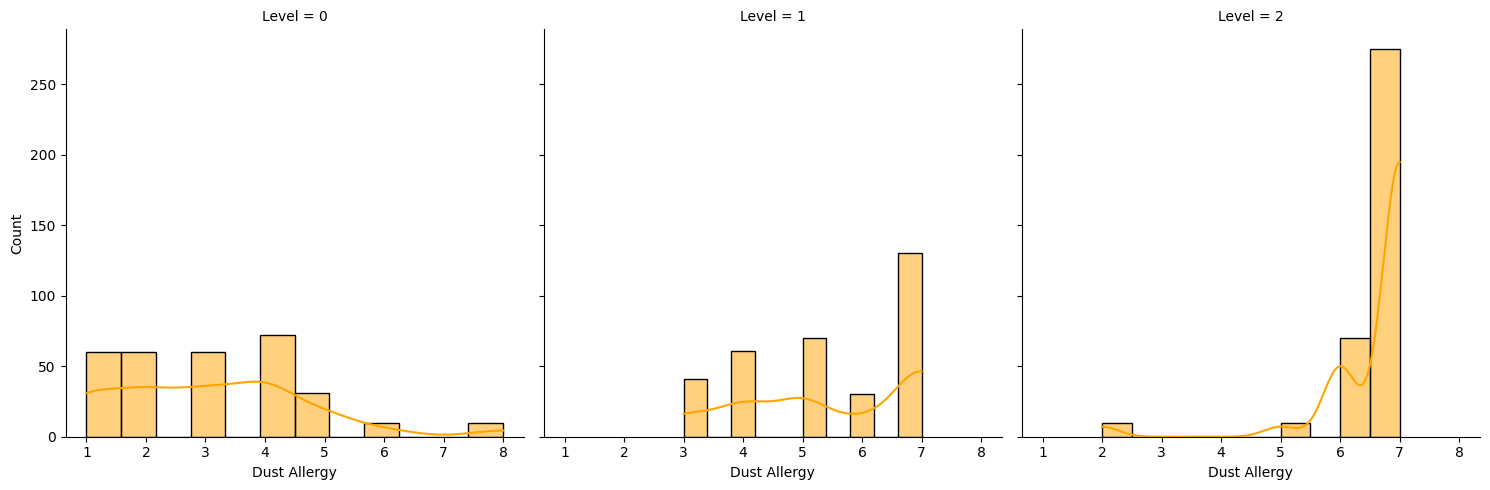

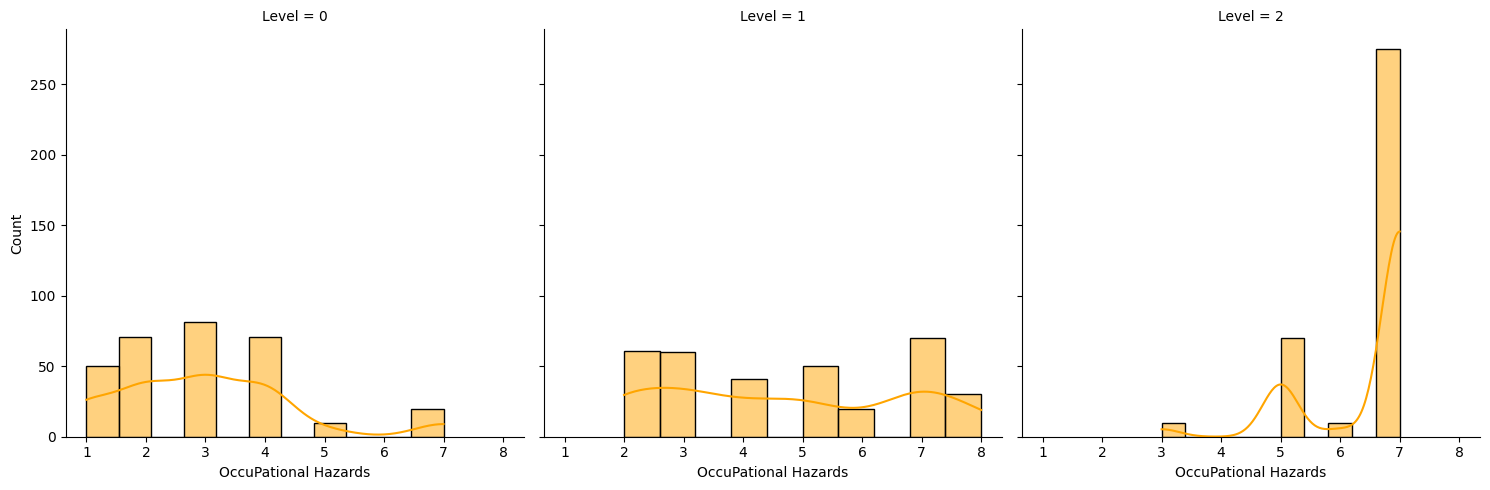

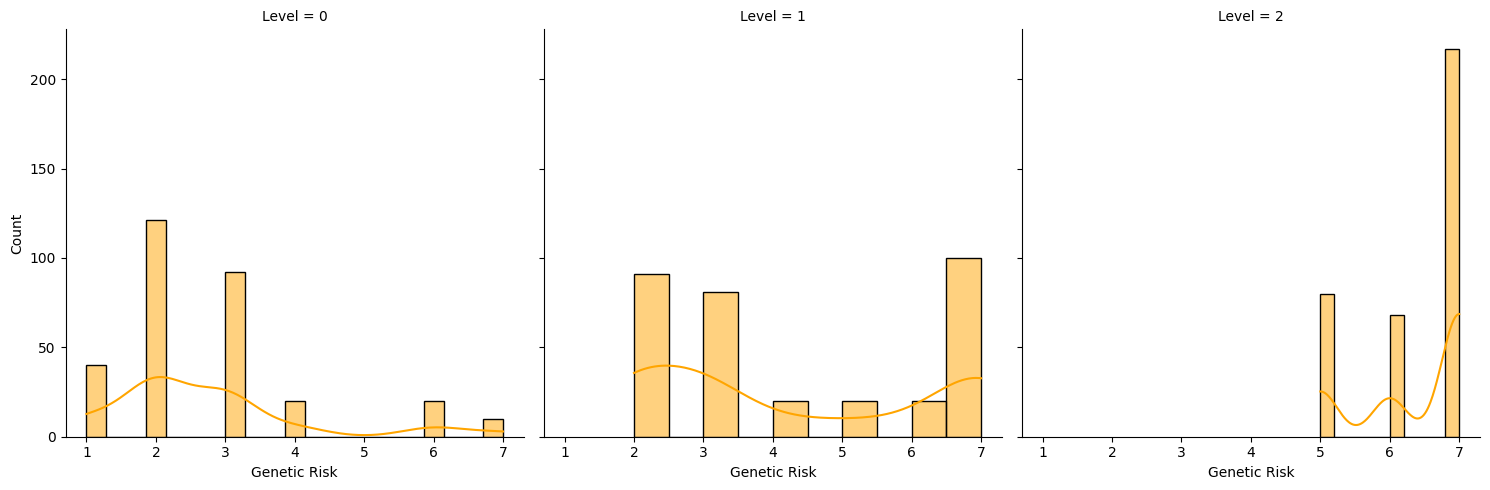

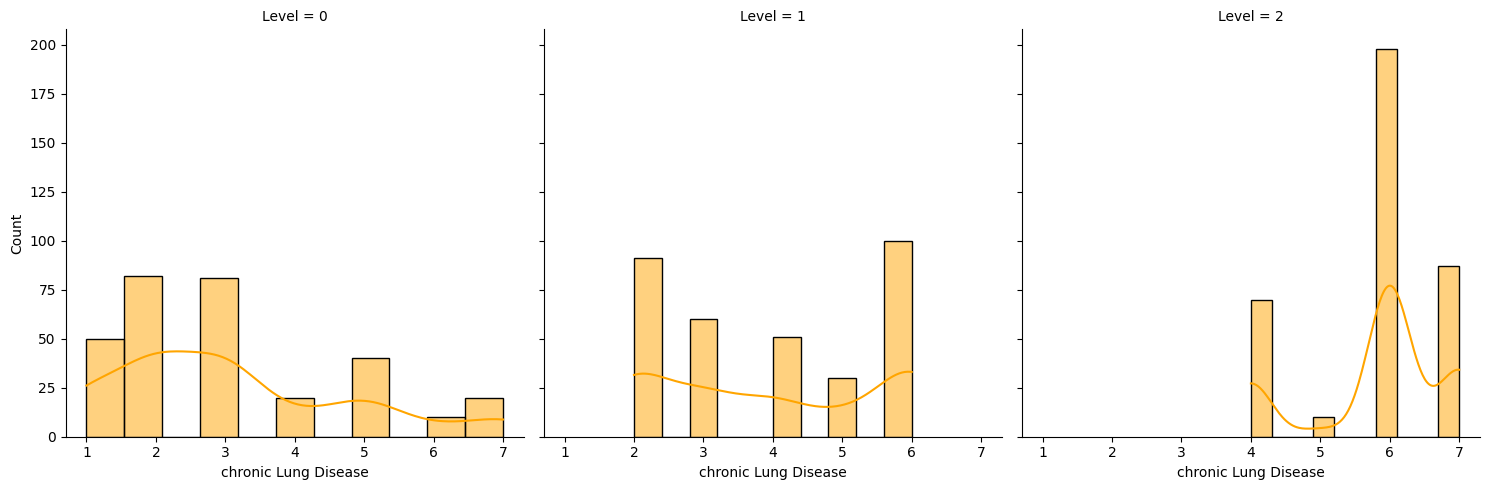

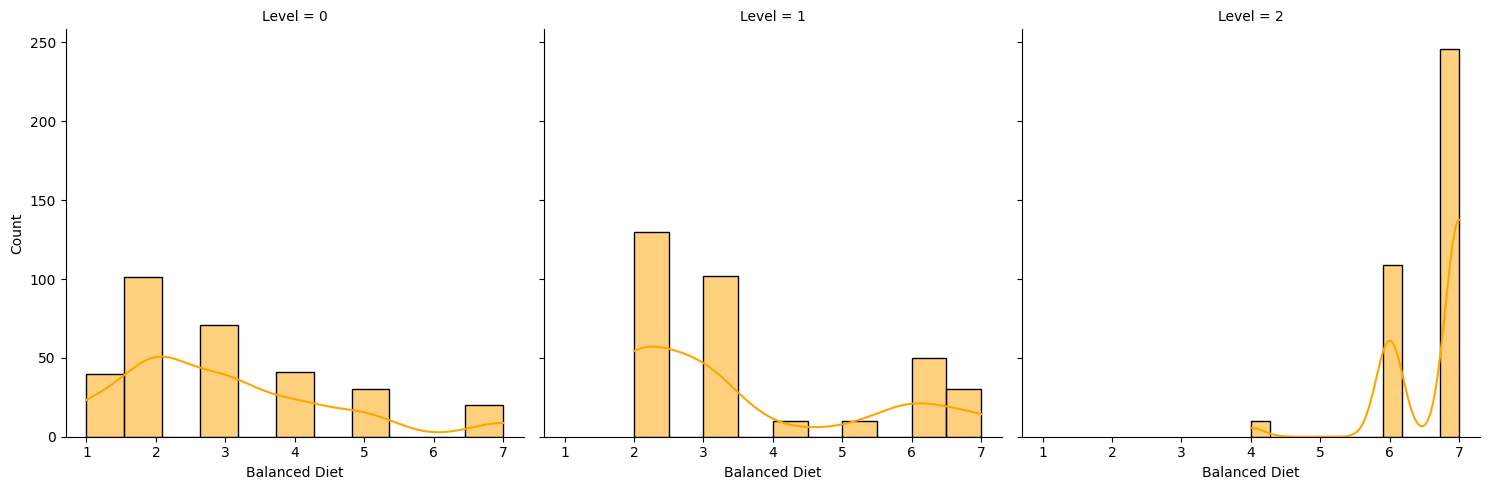

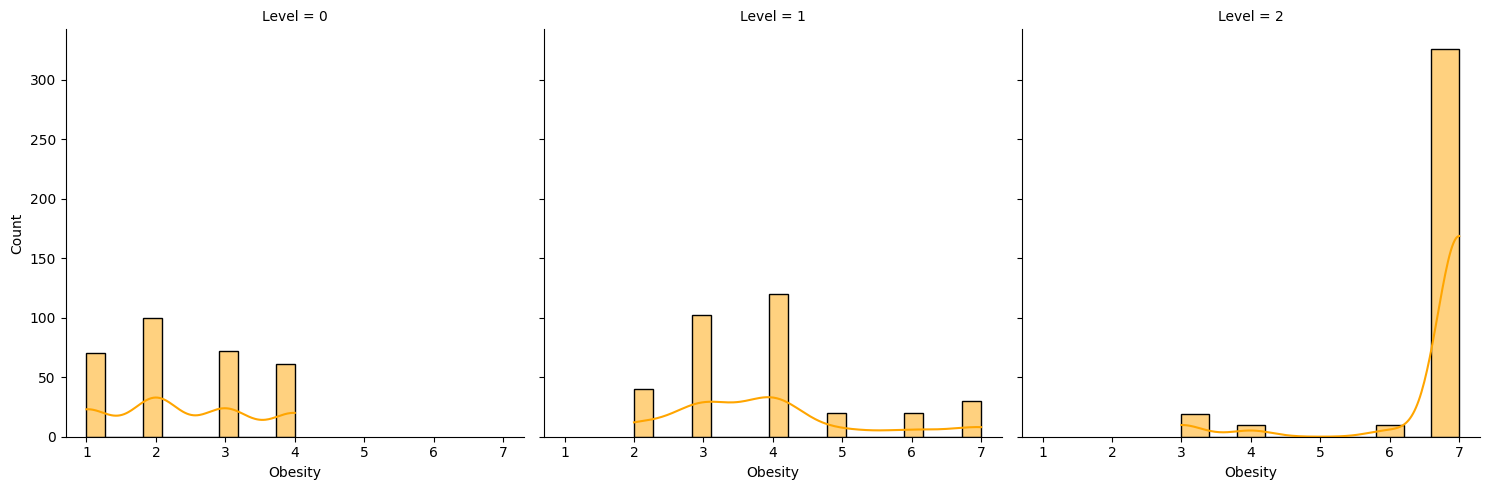

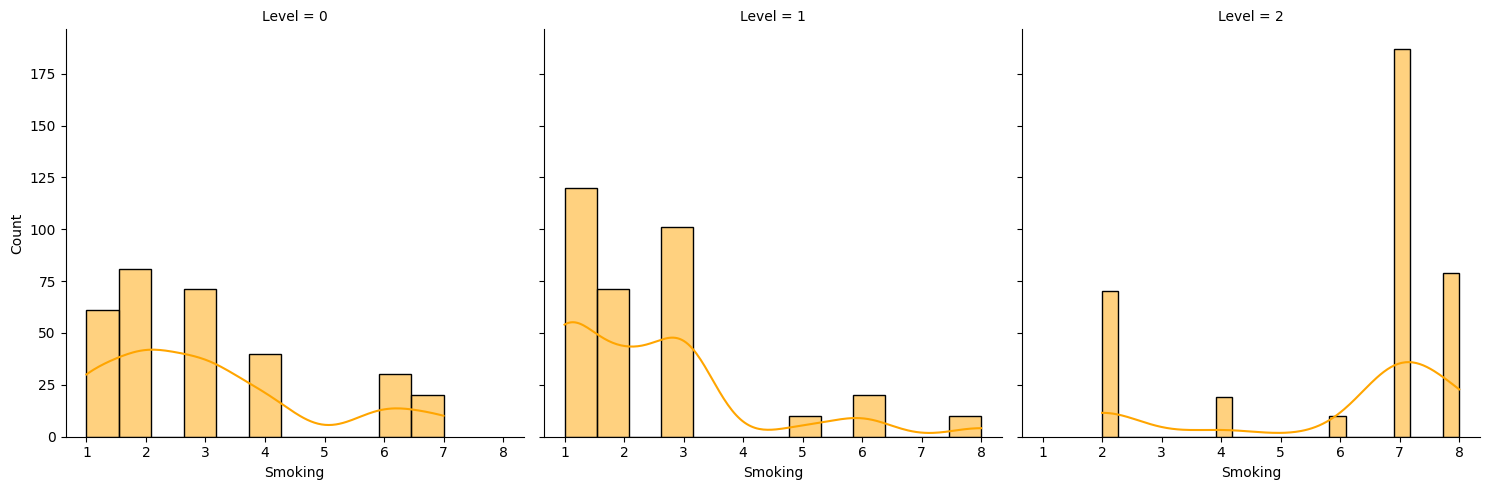

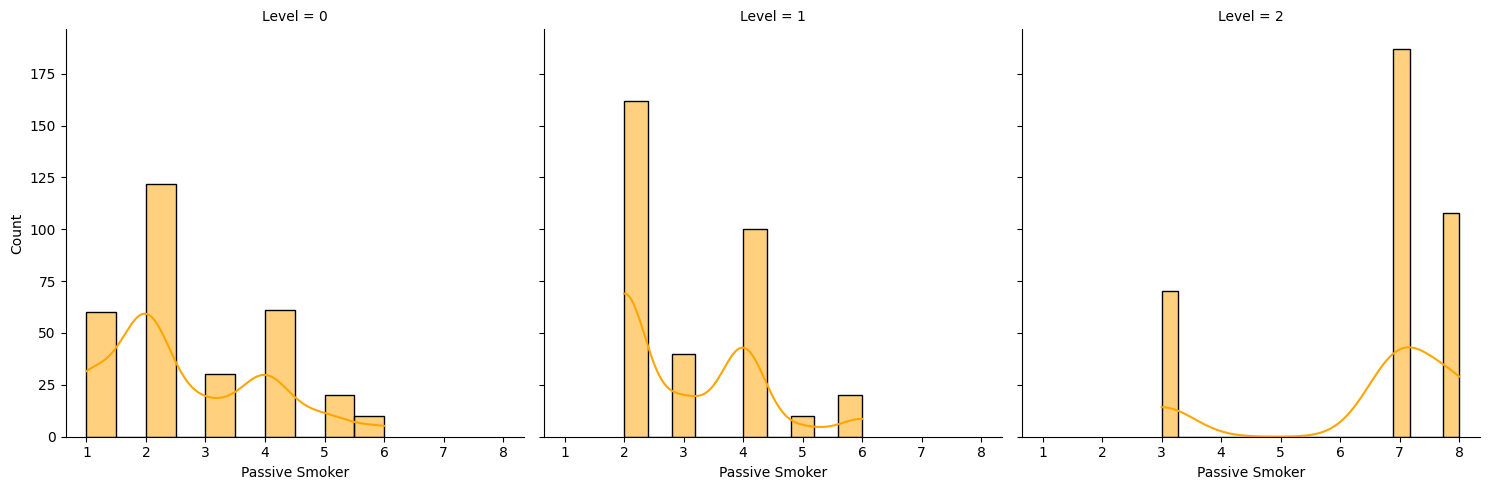

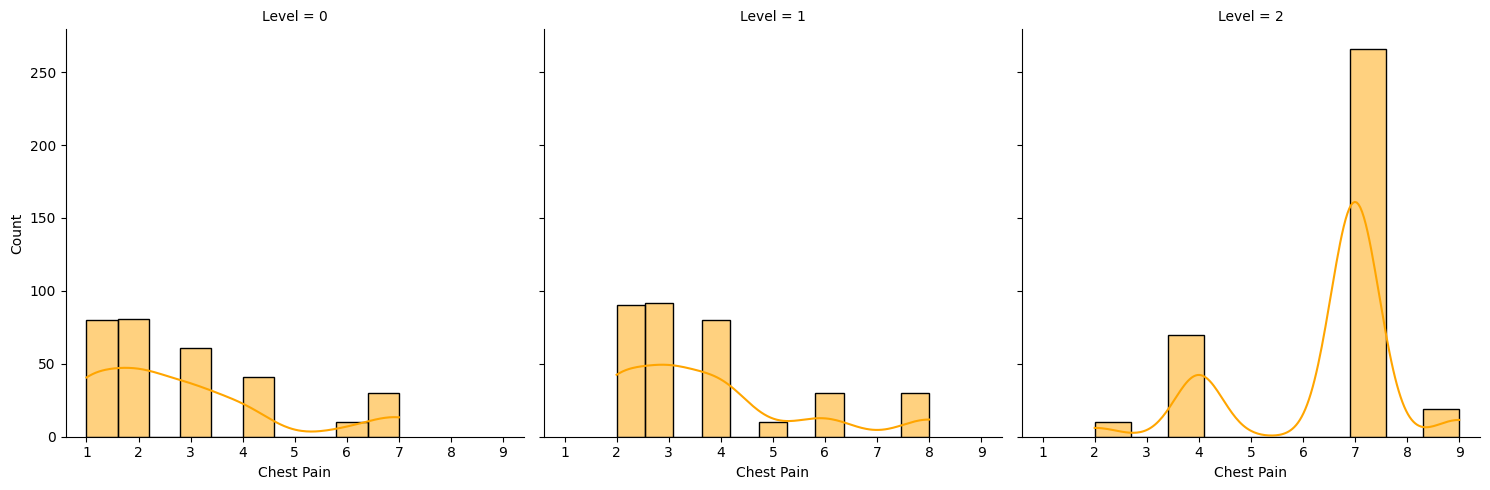

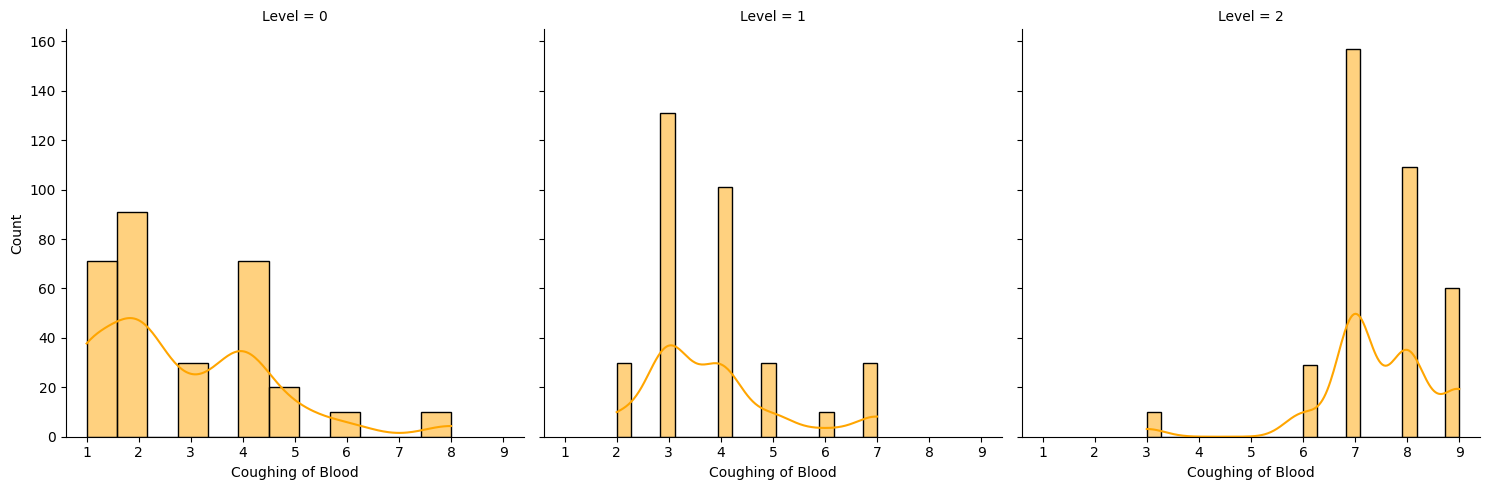

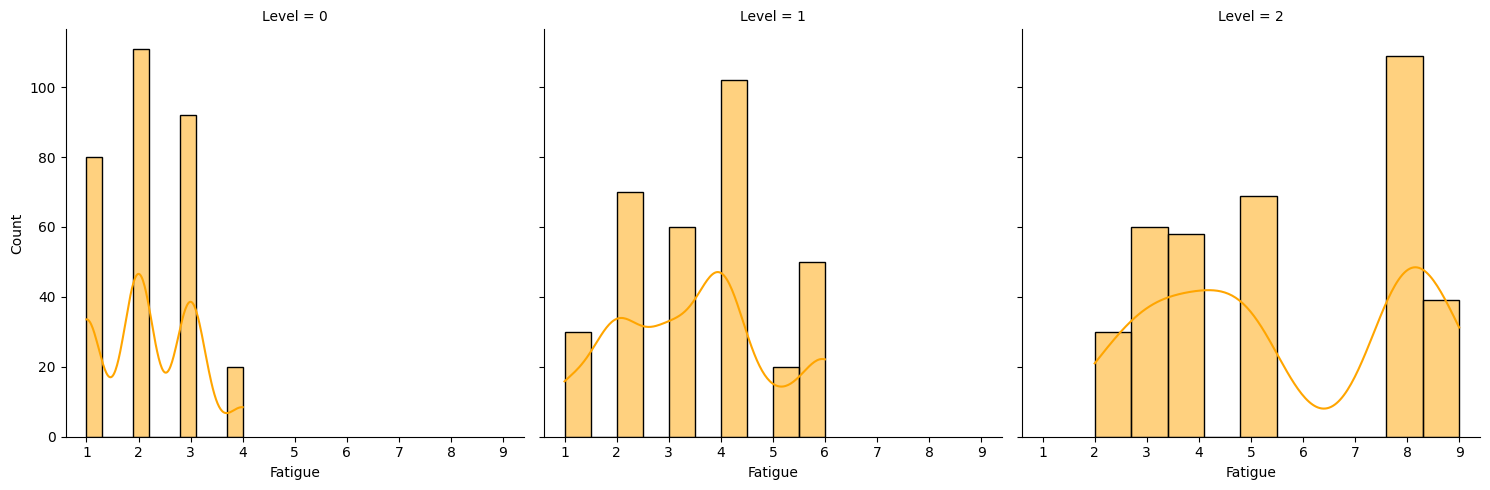

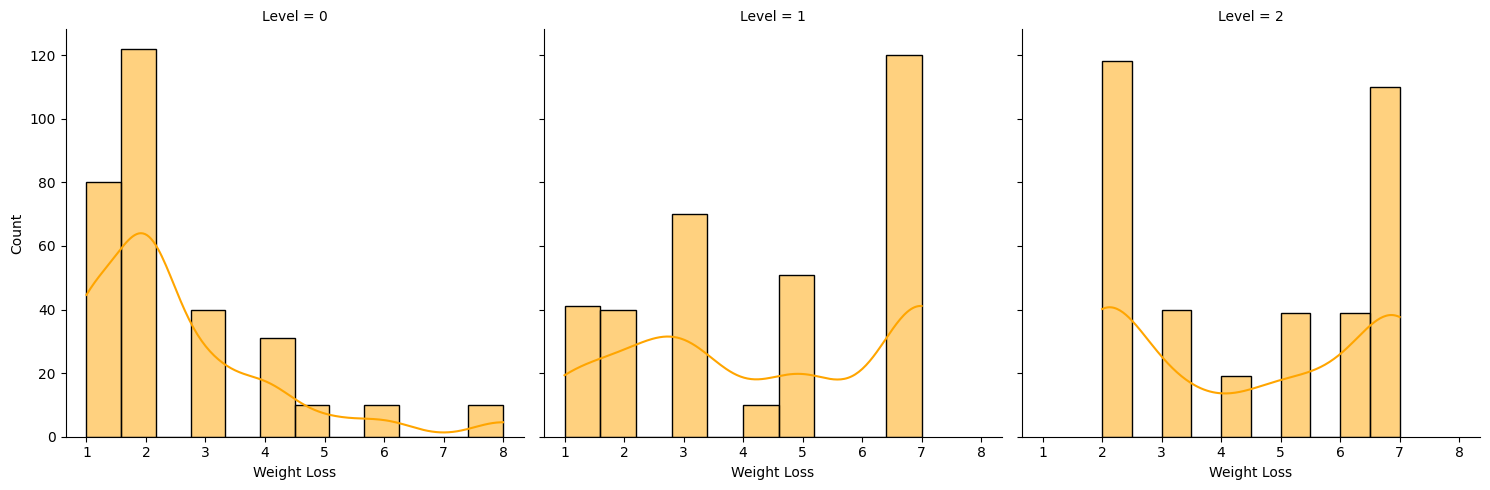

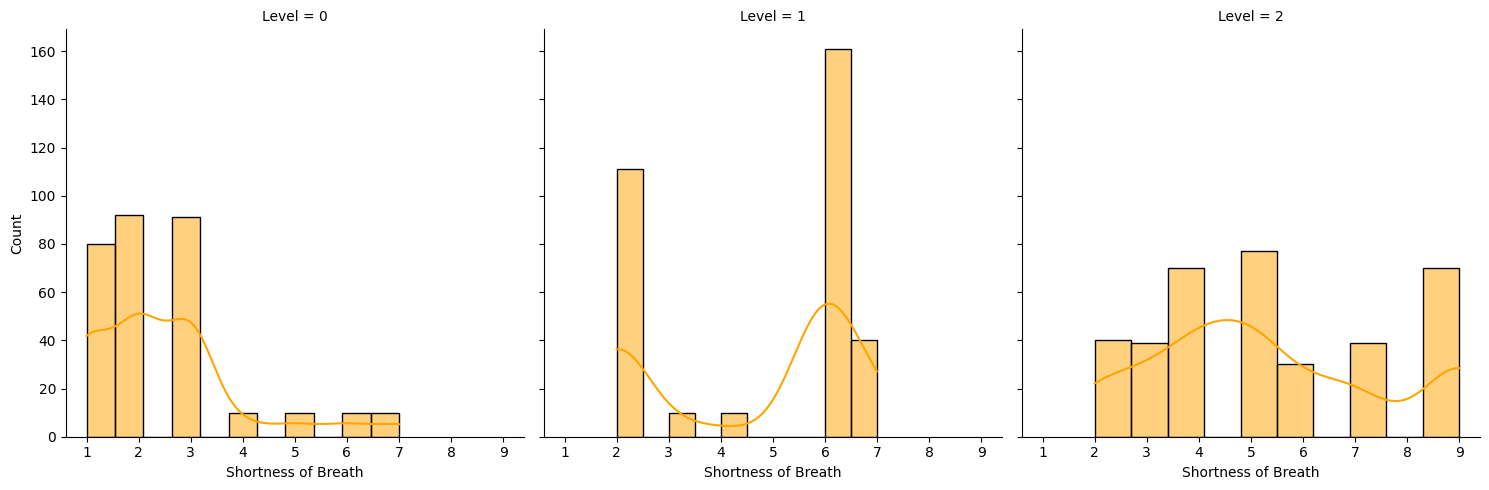

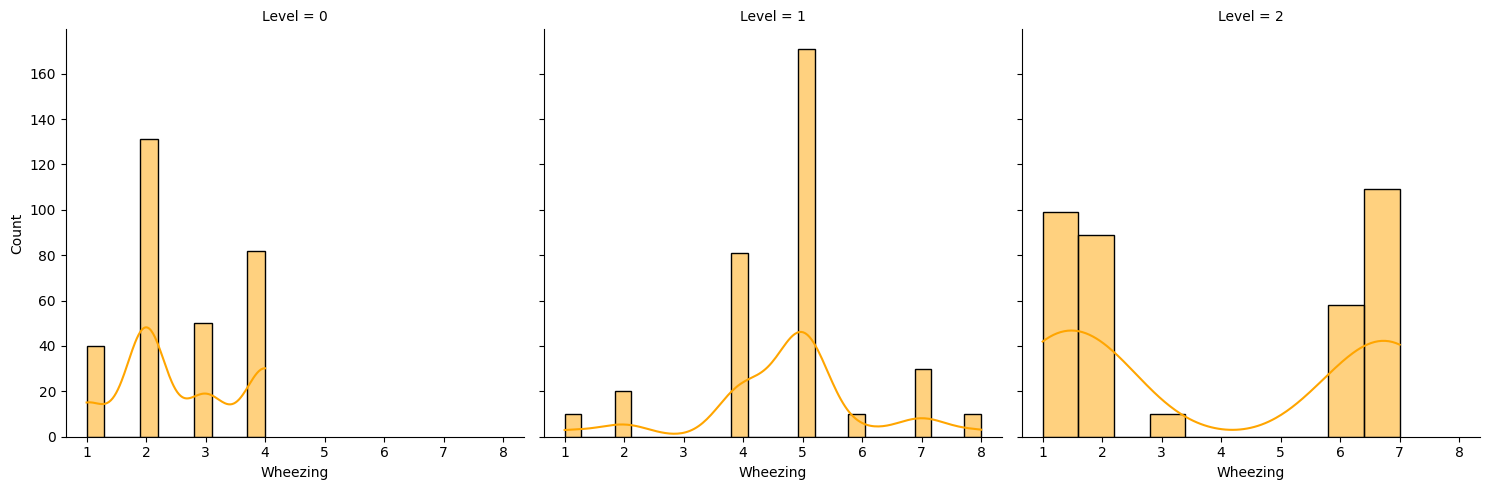

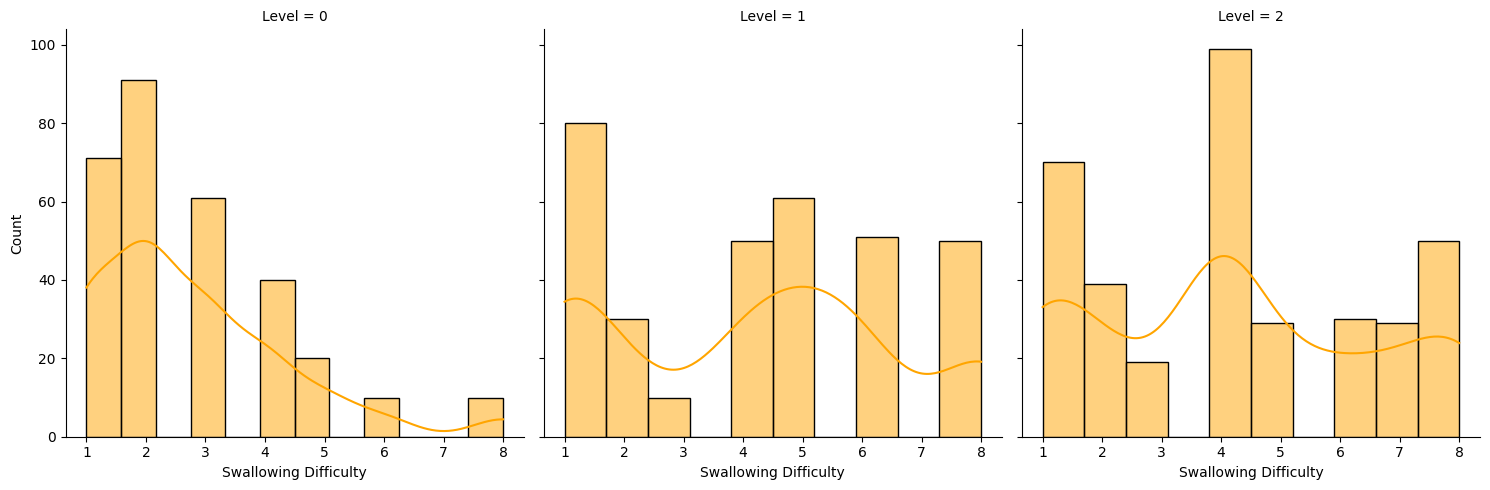

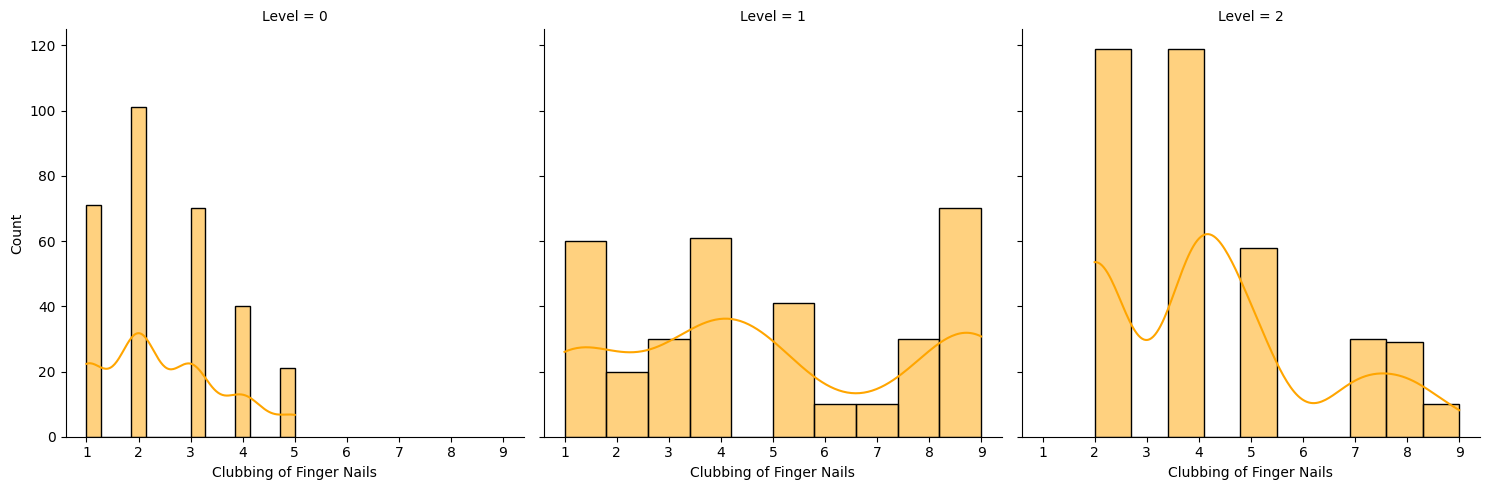

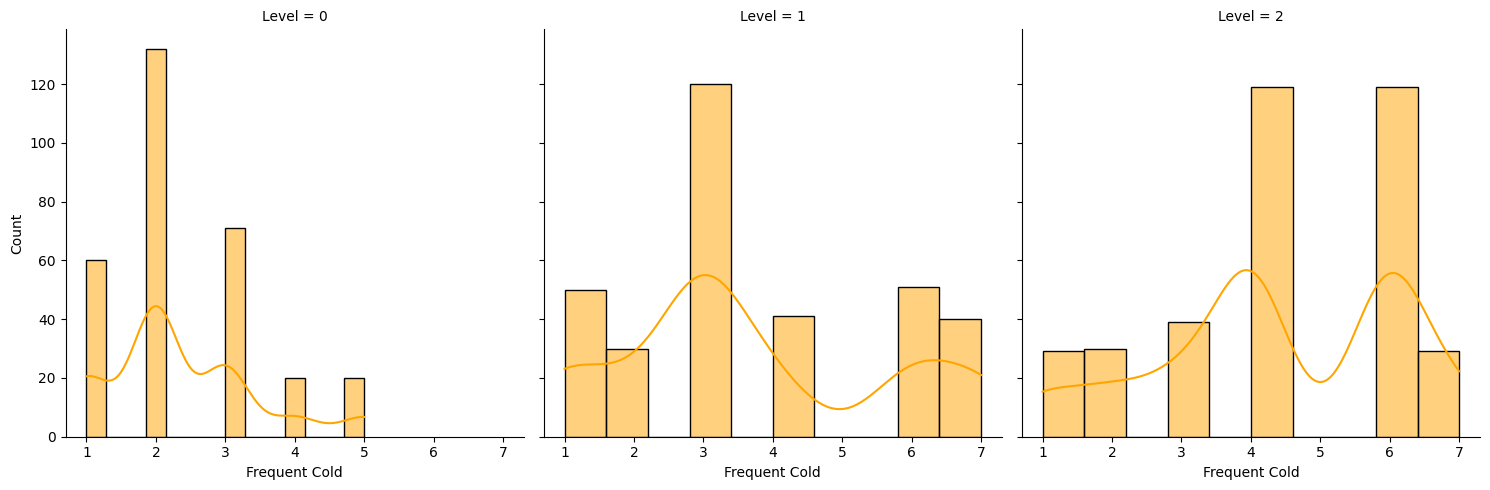

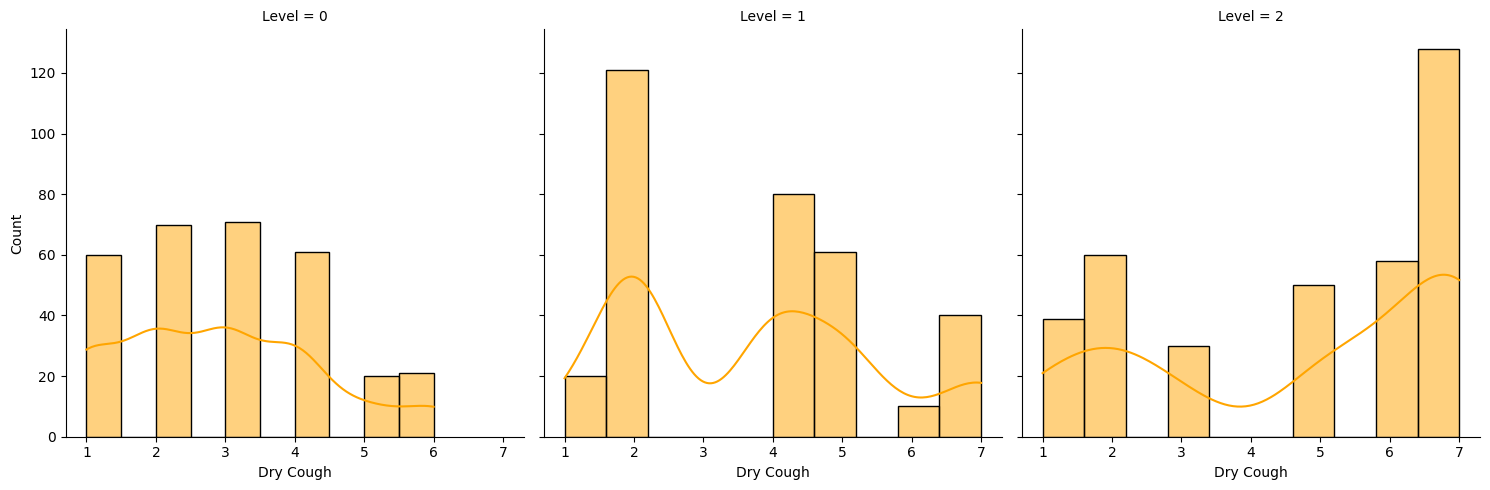

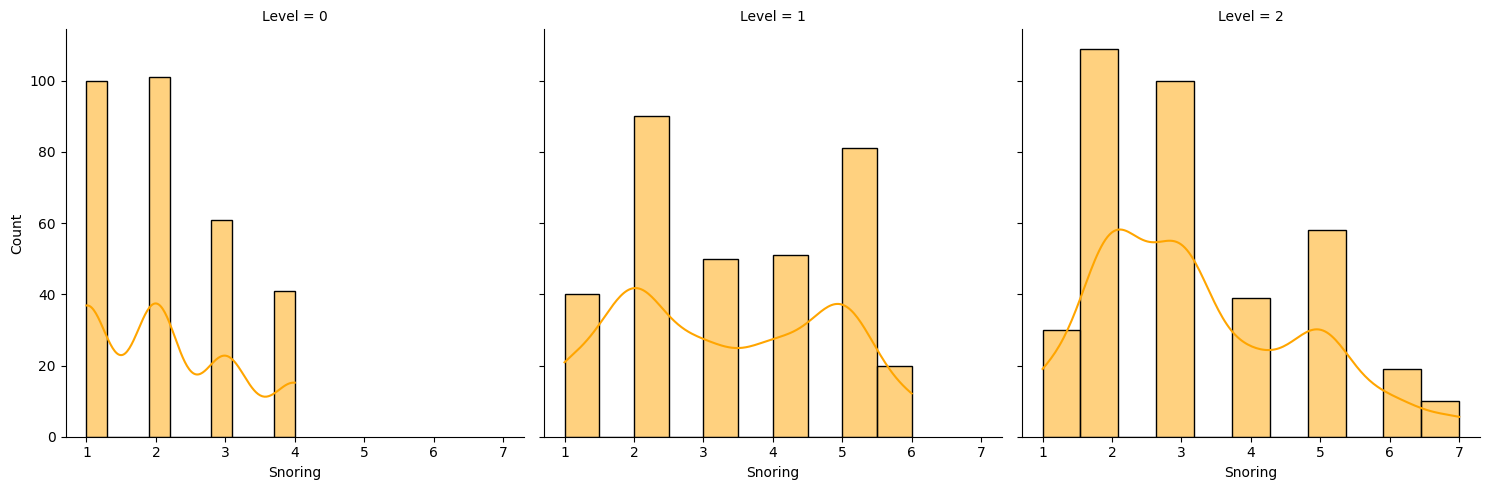

In [ ]:
for i in range(23):
    sea = sns.FacetGrid(data2, col="Level", height=5)
    sea.map(sns.histplot, data2.columns[i], color="orange", kde=True)
    plt.show()

Distribution of levels in the dataset

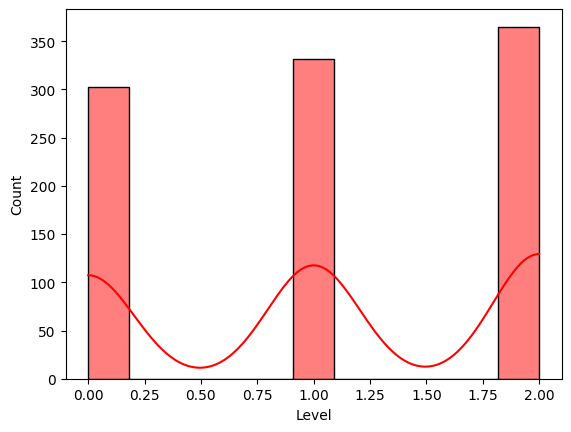

In [ ]:
sns.histplot(data2['Level'], kde=True, color = 'red')
plt.show()

Now dividing into features and target variable

In [ ]:
y = data2.pop('Level')
y.head()

0    0
1    1
2    2
3    2
4    2
Name: Level, dtype: int64

In [ ]:
x = data2
x.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', x_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (800, 23)
Y train shape:  (800,)
X test shape:  (200, 23)
Y test shape:  (200,)


In [ ]:
params_DT ={
    'max_depth': [4],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'max_leaf_nodes': [5, 10],
    'random_state': [42]
}

In [ ]:
model_tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_DT, cv=4)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x_train, y_train)

Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 42}


DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [ ]:
def performTest(y_pred):
    print("Test Data Metrics:")
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print( "Classification Report\n")
    print(classification_report(y_test, y_pred))

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])

    cm.plot( cmap='Oranges', ax=None, xticks_rotation='horizontal')
    print("\n")

Test Data Metrics:
Precision :  0.95
Recall :  0.95
Accuracy :  0.95
F1 Score :  0.9500000000000001

 [[47  6  2]
 [ 0 63  0]
 [ 0  2 80]]


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.89      1.00      0.94        63
           2       0.98      0.98      0.98        82

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



0.95 



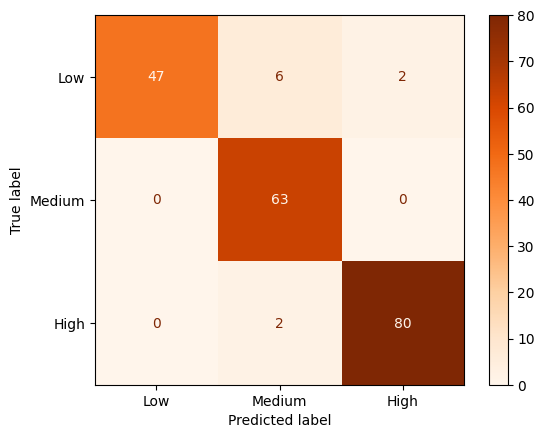

In [ ]:
train_predictions = model_dt.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_dt.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

performTest(test_predictions)
score_model_dt = model_dt.score(x_test, y_test)
print(score_model_dt,"\n")

In [ ]:
data2=pd.read_csv('dataset2.csv')
data2.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
feature_names = data2.columns[0:23]
viz = data2.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


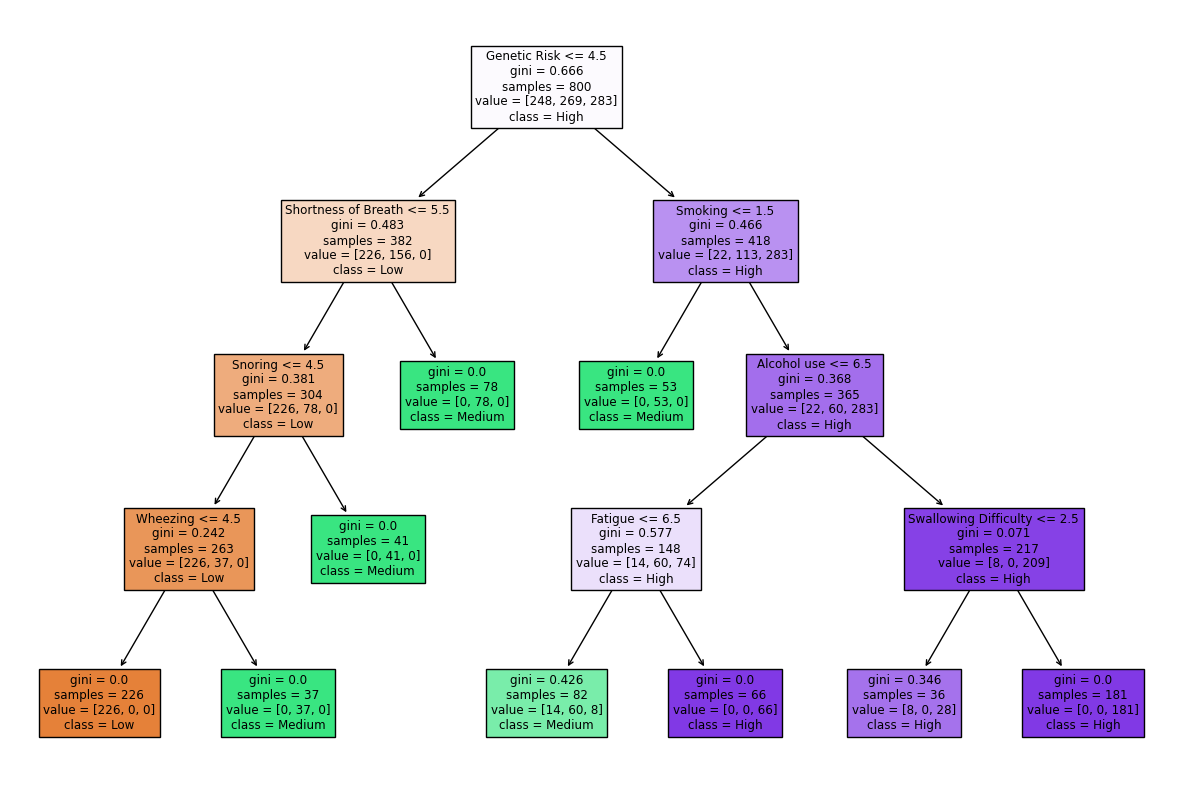

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.show()

Random Forest


In [ ]:
from sklearn.model_selection import GridSearchCV

param_RF = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2],
    'criterion':['gini'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3],
    'random_state' : [42],
    'max_samples': [0.4]

}

In [ ]:
model_tuning = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RF, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


RandomForestClassifier(max_depth=2, max_samples=0.4, min_samples_leaf=2,
                       random_state=42)

Test Data Metrics:
Precision :  0.98
Recall :  0.98
Accuracy :  0.98
F1 Score :  0.98

 [[53  0  2]
 [ 0 62  1]
 [ 0  1 81]]


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.98      0.98      0.98        63
           2       0.96      0.99      0.98        82

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200





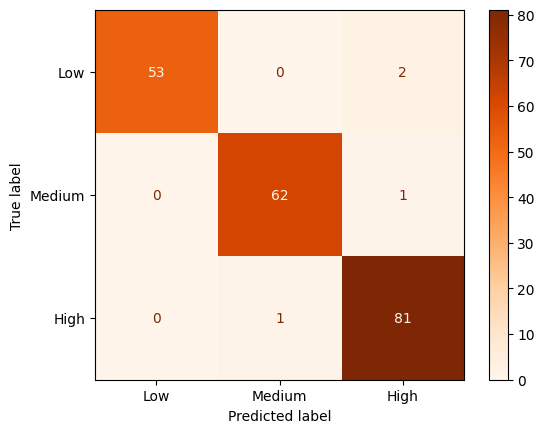

In [ ]:
test_predictions = model_rf.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')
performTest(test_predictions)

Trying out dataset1 in model trained in dataset2

In [ ]:
data1=pd.read_csv('dataset1.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data1["LUNG_CANCER"].replace({'YES': 1, 'NO': 0}, inplace=True)
data1["GENDER"].replace({'M': 1, 'F': 0}, inplace=True)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
data1.rename(columns={'LUNG_CANCER': 'Level'}, inplace=True)
y1 = data1.pop('Level')
y1.head()


0    1
1    1
2    0
3    0
4    0
Name: Level, dtype: int64

In [ ]:
for y in y1:
  if y==2:
    y=1


In [ ]:
X1 = pd.DataFrame()
X1.head()

""


In [ ]:
data1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [ ]:
data1_cols = data1.columns.str.lower()
data2_cols = data2.columns.str.lower()
for column in data2_cols:
    if column in data1_cols:
        original_column = data1.columns[data1_cols == column][0]
        original_column_data2 = data2.columns[data2_cols == column][0]
        X1[original_column_data2] = data1[original_column]
    else:
        original_column = data2.columns[data2_cols == column][0]
        X1[original_column] = data2[original_column][:309].values
X1.head()
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       309 non-null    int64 
 1   Gender                    309 non-null    int64 
 2   Air Pollution             309 non-null    int64 
 3   Alcohol use               309 non-null    int64 
 4   Dust Allergy              309 non-null    int64 
 5   OccuPational Hazards      309 non-null    int64 
 6   Genetic Risk              309 non-null    int64 
 7   chronic Lung Disease      309 non-null    int64 
 8   Balanced Diet             309 non-null    int64 
 9   Obesity                   309 non-null    int64 
 10  Smoking                   309 non-null    int64 
 11  Passive Smoker            309 non-null    int64 
 12  Chest Pain                309 non-null    int64 
 13  Coughing of Blood         309 non-null    int64 
 14  Fatigue                   

In [ ]:
X1.pop("Level")
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       309 non-null    int64
 1   Gender                    309 non-null    int64
 2   Air Pollution             309 non-null    int64
 3   Alcohol use               309 non-null    int64
 4   Dust Allergy              309 non-null    int64
 5   OccuPational Hazards      309 non-null    int64
 6   Genetic Risk              309 non-null    int64
 7   chronic Lung Disease      309 non-null    int64
 8   Balanced Diet             309 non-null    int64
 9   Obesity                   309 non-null    int64
 10  Smoking                   309 non-null    int64
 11  Passive Smoker            309 non-null    int64
 12  Chest Pain                309 non-null    int64
 13  Coughing of Blood         309 non-null    int64
 14  Fatigue                   309 non-null    

Test Data Metrics:
Precision :  0.3883495145631068
Recall :  0.3883495145631068
Accuracy :  0.3883495145631068
F1 Score :  0.3883495145631068

 [[ 20  15   4]
 [108 100  62]
 [  0   0   0]]


Classification Report

              precision    recall  f1-score   support

           0       0.16      0.51      0.24        39
           1       0.87      0.37      0.52       270
           2       0.00      0.00      0.00         0

    accuracy                           0.39       309
   macro avg       0.34      0.29      0.25       309
weighted avg       0.78      0.39      0.48       309



0.3883495145631068 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


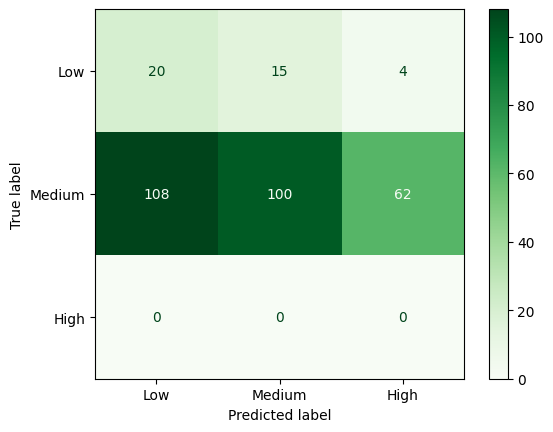

In [ ]:
Testpred1 = model_dt.predict(X1)
r2_test = r2_score(y1, Testpred1)
f1_test = f1_score(y1, Testpred1, average = 'micro')

print("Test Data Metrics:")
print("Precision : ", precision_score(y1, Testpred1, average = 'micro'))
print("Recall : ", recall_score(y1, Testpred1, average = 'micro'))
print("Accuracy : ", accuracy_score(y1, Testpred1))
print("F1 Score : ", f1_score(y1, Testpred1, average = 'micro'))
cm = confusion_matrix(y1, Testpred1)
print("\n", cm)
print("\n")
print( "Classification Report\n")
print(classification_report(y1, Testpred1))

cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])

cm.plot( cmap='Greens', ax=None, xticks_rotation='horizontal')
print("\n")
score_model_dt = model_dt.score(X1, y1)
print(score_model_dt,"\n")

In [ ]:
cm_3x3 = confusion_matrix(y1, Testpred1)
tn = cm_3x3[0, 0]

# False positives (Low predicted as Medium or High)
fp = cm_3x3[0, 1] + cm_3x3[0, 2]

# False negatives (Medium or High predicted as Low)
fn = cm_3x3[1, 0] + cm_3x3[2, 0]

# True positives (Medium or High predicted as Medium or High)
tp = cm_3x3[1, 1] + cm_3x3[1, 2] + cm_3x3[2, 1] + cm_3x3[2, 2]

# Construct the 2x2 confusion matrix
cm_2x2 = np.array([[tn, fp], [fn, tp]])

print("2x2 Confusion Matrix:")
print(cm_2x2)

2x2 Confusion Matrix:
[[ 20  19]
 [108 162]]


In [ ]:
def Scoring(confusion_matrix):
  TN = confusion_matrix[0, 0]
  FP = confusion_matrix[0, 1]
  FN = confusion_matrix[1, 0]
  TP = confusion_matrix[1, 1]
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1_score = 2 * (precision * recall) / (precision + recall)

  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1_score:.2f}")
  print(f"Accuracy: {accuracy:.2f}")


In [ ]:
Scoring(cm_2x2)

Precision: 0.90
Recall: 0.60
F1 Score: 0.72
Accuracy: 0.59


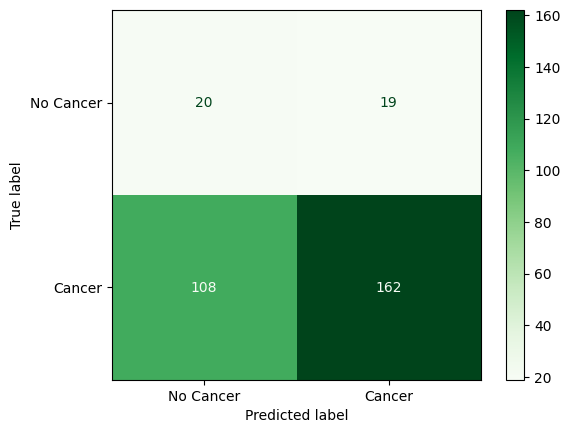

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix = cm_2x2, display_labels=['No Cancer', 'Cancer'])
cm.plot( cmap='Greens', ax=None, xticks_rotation='horizontal')
plt.show()

Random Forest

Test Data Metrics:
Precision :  0.27184466019417475
Recall :  0.27184466019417475
Accuracy :  0.27184466019417475
F1 Score :  0.27184466019417475

 [[ 19   8  12]
 [116  65  89]
 [  0   0   0]]


Classification Report

              precision    recall  f1-score   support

           0       0.14      0.49      0.22        39
           1       0.89      0.24      0.38       270
           2       0.00      0.00      0.00         0

    accuracy                           0.27       309
   macro avg       0.34      0.24      0.20       309
weighted avg       0.80      0.27      0.36       309



0.27184466019417475 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


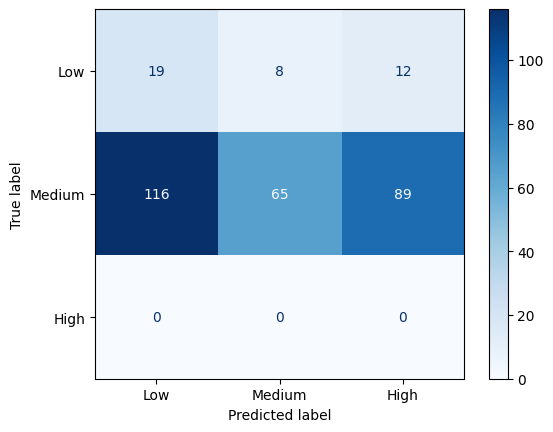

In [ ]:
Testpred1 = model_rf.predict(X1)
r2_test = r2_score(y1, Testpred1)
f1_test = f1_score(y1, Testpred1, average = 'micro')

print("Test Data Metrics:")
print("Precision : ", precision_score(y1, Testpred1, average = 'micro'))
print("Recall : ", recall_score(y1, Testpred1, average = 'micro'))
print("Accuracy : ", accuracy_score(y1, Testpred1))
print("F1 Score : ", f1_score(y1, Testpred1, average = 'micro'))
cm = confusion_matrix(y1, Testpred1)
print("\n", cm)
print("\n")
print( "Classification Report\n")
print(classification_report(y1, Testpred1))

cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])

cm.plot( cmap='Blues', ax=None, xticks_rotation='horizontal')
print("\n")
score_model_rf = model_rf.score(X1, y1)
print(score_model_rf,"\n")

In [ ]:
cm_3x3 = confusion_matrix(y1, Testpred1)
tn = cm_3x3[0, 0]

# False positives (Low predicted as Medium or High)
fp = cm_3x3[0, 1] + cm_3x3[0, 2]

# False negatives (Medium or High predicted as Low)
fn = cm_3x3[1, 0] + cm_3x3[2, 0]

# True positives (Medium or High predicted as Medium or High)
tp = cm_3x3[1, 1] + cm_3x3[1, 2] + cm_3x3[2, 1] + cm_3x3[2, 2]

# Construct the 2x2 confusion matrix
cm_2x2 = np.array([[tn, fp], [fn, tp]])

print("2x2 Confusion Matrix:")
print(cm_2x2)

2x2 Confusion Matrix:
[[ 19  20]
 [116 154]]


In [ ]:
Scoring(cm_2x2)

Precision: 0.89
Recall: 0.57
F1 Score: 0.69
Accuracy: 0.56


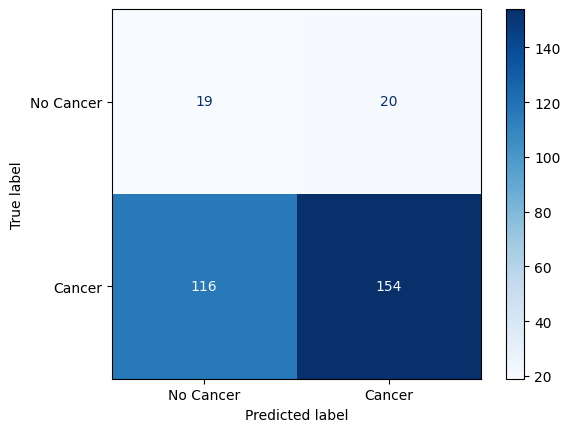

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix = cm_2x2, display_labels=['No Cancer', 'Cancer'])
cm.plot( cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.show()